# 广告投放及效果分析

![png](./pics/思维导图.png)

## 背景

广告商给广告主提供商品、内容、服务等展示的渠道，通过收取相应的广告费而获取报酬。
广告主则通过广告商把自己的商品或服务告知大众，通过大众了解后产生的购买或消费行为来获取报酬。

这是关于某个社交媒体的广告活动记录，包括所投放的用户群体以及曝光、点击、转化等指标。


## 目标

1. 优化广告投放（从广告商的角度）

2. 评估广告投放效果（从广告主的角度）


### DATA
数据源：https://www.kaggle.com/loveall/clicks-conversion-tracking

Descriptions of the variables:

1.) ad_id: an unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.


## 一. 数据观察及检测

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.3+ KB


** 观察分析 **

通过观察可以看到，此数据集不存在空缺值和异常值。

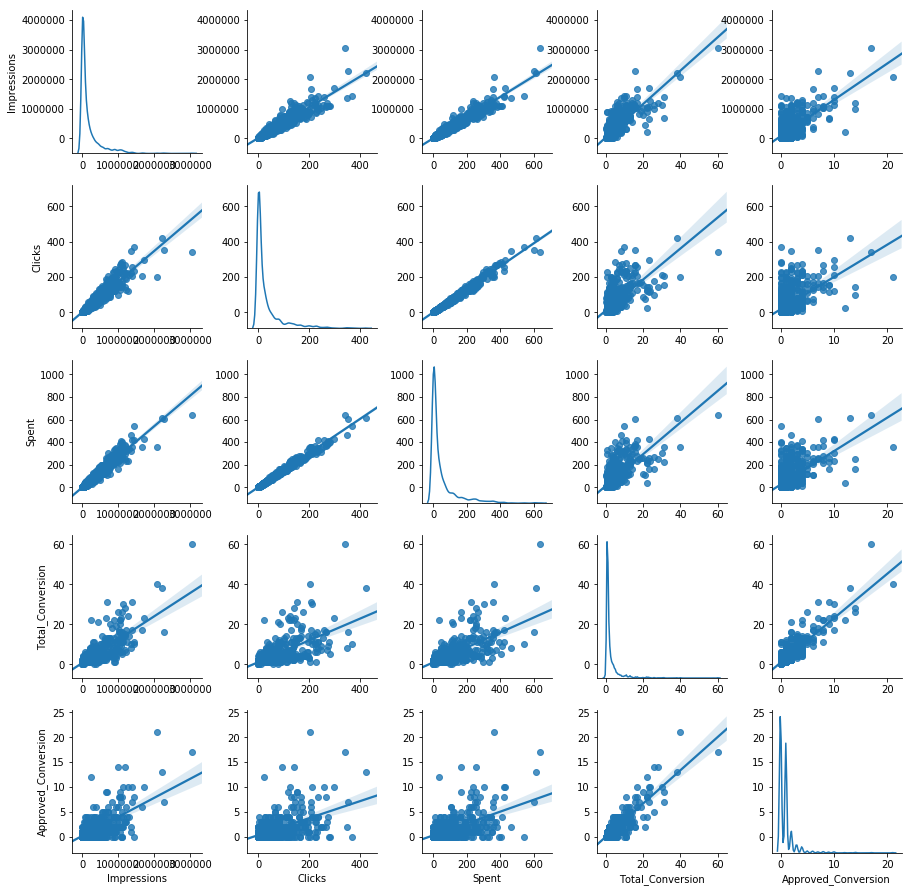

In [11]:
sns.pairplot(df[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']], diag_kind = 'kde', kind="reg") 

** 观察分析 **

通过属性变量的分布情况可以知道广告的曝光、点击、花费和转化呈现严重的偏态分布，说明只有很少一部分广告得到大量的展现机会以及点击和转换。

从属性间的相关性，可以看出'Impressions','Clicks','Spent'这三者间存在较大相关性，因此这里付费的方式推测为CPC(Cost Per Click)，这种付费方式广泛的应用于各大广告商中。

## 二. 广告投放分析
广告商通常通过预估CTR来进行广告投放，因此这里通过分析CTR指标来分析广告投放。

xyz_campaign_id代表不同的广告主所投放的广告，也就是说通过xyz_campaign_id我们可以区分出广告主，因此接下来将对不同广告主的广告投放进行分析。

CTR (Click Through Rate)：Ratio of users of who click on an ad to the number of total users who view the ad. It used to measure the succuss of an online advertising campaign.

CTR = Clicks/Impressions * 100%

In [25]:
df['CTR(%)'] = round(df.Clicks / df.Impressions *100, 6)
df.to_csv('ctr_data.csv', index=False)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR(%)
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


### 1. 投放量分析
哪个公司在此平台的广告投放量最多？

![png](./pics/quantity.png)

** 分析 **

xyz_campaign_id为1178的投放量最多有625个，其次为936的投放量，最少是916的投放量。

### 2. 曝光量分析
![png](./pics/impressions.png)

** 分析 **

1178的广告展示量是最高的，达到95.97%；916的广告最少，1%都不到。1178的投放量大，但也得到了足够的展示，那么CTR是否也是最高的？

### 3. CTR分析

![png](./pics/ctr.png)

** 分析 **

虽然1178的投放量多，但它的平均CTR转换率却是最低的，916的转换率反而是最高的。影响CTR的因素有哪些？接下来将对这些因素进行分析。


### 3.1 Age
哪个年龄段的CTR最高?
![png](./pics/age.png)

** 分析 **

对916而言，更能吸引45-49和35-39岁阶段的用户；对936和1178的广告而言，年龄越大的客户越受它们的广告吸引。总的来说45-49岁年龄段的用户最容易对这些广告进行点击。

### 3.2 Gender
![png](./pics/gender.png)

** 分析 **

总体而言，广告对女性更具吸引力。

### 3.3 Interest

In [41]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178])

In [26]:
df.interest.unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104, 106])

In [38]:
# xyz_campaign_id==916
df_916 = df[df.xyz_campaign_id==916]
df_916.groupby(['xyz_campaign_id','interest'])['CTR(%)'].mean().reset_index().sort_values('CTR(%)', ascending=False)

,xyz_campaign_id,interest,CTR(%)
7,916,21,0.045830
8,916,24,0.043802
13,916,30,0.043384
9,916,25,0.039872
17,916,65,0.038405
15,916,32,0.032352
6,916,20,0.027884
10,916,27,0.025523
16,916,63,0.019918
11,916,28,0.019812


In [39]:
# xyz_campaign_id==936
df_916 = df[df.xyz_campaign_id==936]
df_916.groupby(['xyz_campaign_id','interest'])['CTR(%)'].mean().reset_index().sort_values('CTR(%)', ascending=False)

,xyz_campaign_id,interest,CTR(%)
11,936,24,0.034444
9,936,22,0.029504
7,936,20,0.022510
12,936,25,0.022327
14,936,27,0.021781
0,936,2,0.020720
15,936,28,0.020686
6,936,19,0.019320
21,936,63,0.018661
2,936,10,0.017947


In [42]:
# xyz_campaign_id==1178
df_916 = df[df.xyz_campaign_id==1178]
df_916.groupby(['xyz_campaign_id','interest'])['CTR(%)'].mean().reset_index().sort_values('CTR(%)', ascending=False)

,xyz_campaign_id,interest,CTR(%)
12,1178,25,0.020254
23,1178,65,0.020181
11,1178,24,0.019249
31,1178,106,0.019130
15,1178,28,0.018703
14,1178,27,0.018526
6,1178,19,0.018196
17,1178,30,0.018139
34,1178,109,0.017896
13,1178,26,0.017539


![png](./pics/interest.png)

** 分析 **

916的广告最受兴趣爱好编号为21、24、30、25、65的用户欢迎，同时兴趣爱好编号为19、18、31、7的用户基本2不会进行点击；

936的广告最受兴趣爱好编号为24、22、20、25、27的用户欢迎；

1178的广告最受兴趣爱好编号为25、65、24、106、28的用户欢迎；

综合以上结果，兴趣爱好编号为24、25、65的用户对广告点击的欲望最高。


对点击转化率来说，916的广告受用户兴趣爱好影响最大，不同兴趣爱好的用户对此广告的态度差别较大；
1178的广告受用户兴趣爱好影响最小，不同兴趣爱好的用户对此广告的态度差别不大。

## 三. 广告效果分析

从效果评估的角度来说，有ROI（投资回报率）以及ROAS（广告支出回报率）这样的指标能直接对效果进行分析，但在这份数据中缺少回报相关数据（从广告主的角度），我们不知道每个商品卖出后获利多少。因此这里采用CVR（转化率）进行效果分析，无论是ROI还是ROAS都与转化率密不可分。

CVR (Conversion Rate): 转化率, 是衡量广告效果的指标。
CVR_total = Total_Conversion/Clicks * 100%
CVR_approved = Approved_Conversion/Clicks * 100%

In [4]:
df_ = pd.read_csv('ctr_data.csv')
df_.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR(%)
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


In [8]:
df_['CVR_total(%)'] = df_['Total_Conversion']/df_['Clicks'] * 100
df_['CVR_approved(%)'] = df_['Approved_Conversion']/df_['Clicks'] * 100
df_.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR(%),CVR_total(%),CVR_approved(%)
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,200.000000,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,100.000000,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,inf,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,100.000000,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,100.000000,100.0


In [10]:
# 用Clicks不等于0的数据来分析，只看有点击量的广告效果
df_conversion = df_[df_.Clicks>0]
df_conversion.to_csv('cvr_data.csv', index=False)
df_conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR(%),CVR_total(%),CVR_approved(%)
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,200.000000,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,100.000000,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,100.000000,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,100.000000,100.0
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,0.019212,33.333333,0.0


#### CVR

![png](./pics/cvr.png)

** 分析 **

与CTR比较，可以发现总体上CTR越高CVR也越高。那么影响CVR的因素是否也与CTR相同呢？接下来分析带来转化的用户群。


#### 1. age
![png](./pics/cvr_age.png)

** 分析 **

对916而言，虽然45-49岁的人群点击率最高，但转化率最高的是40-44岁的人群；对936而言，30-39岁的转化率也高于40-49岁；对1178而言，转化率随年龄增高而递减。

可见点击率最高的45-49岁人群并不会带来最高的转化率。这时候可以反观产品的人群年龄定位是否准确，价格设定是否合理等原因。当然还有可能是因为年龄越大的人群越不容易受广告影响，年龄层越低越有可能进行冲动购买。

#### 2. gender
![png](./pics/cvr_gender.png)

** 分析 **

在性别方面，CVR与CTR正好相反。对于三个不同广告主来说，虽然点击转化率女性高于男性，但购买转化率男性高于女性，这也从一定程度上反映了女性可能更喜欢看，对于不需要的商品也喜欢去看一看，而男性在购买方面更加果断。

### 四. 总结及建议

#### 广告投放分析：

1. xyz_campaign_id为1178的广告投放量最多，同时得到曝光的机会也最多，916则最少
2. 从点击转化率看，916的最高，1178的反而最少
3. 45-49岁年龄段的用户最容易对这些广告进行点击
4. 女性比男性更容易受广告吸引
5. 对点击转化率来说，916的广告受用户兴趣爱好影响最大，1178最小；而其中兴趣爱好编号为24、25、65的用户对广告点击的欲望最高

总之，如果希望提高CTR转化率，应该把广告主要投在45-49岁年龄段，兴趣爱好编号为24、25、65的女性用户群体。

#### 广告效果分析：

1. 从价值转化率来看，916的转化率最高，1178的转化率最低，这点与点击转化率一致
2. 带来转化价值的用户群集中在相对低的年龄段（30-39）
3. 男性的转化率高于女性

除了关注广告本身（文案、图片、吸引力等）带来的点击外，还要注意产品或服务的定位，价格的设定等因素。

